# Parkinsons - EDA

In [1]:
import pandas as pd
import seaborn as sns
# Loading data
path = '/Users/kaylakim/Documents/TheUnicornTwins/TUT.Projects/MedicalPros/ParkinsonProject/'
p_data = pd.read_csv(path + 'parkinsons.csv')

# printing the first 5 rows of the dataframe
p_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [2]:
p_data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [3]:
p_data.shape

(195, 24)

>We've got 22 features and 195 samples.

- To optimize our resources, we need to select which is more important features at first by the way making the Bivariate Analysis for Continuous Variables vs. Continuous Variables.

## Bi-variate Analysis
- Continuous vs. Continuous

In [4]:
p_data_ = p_data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR','RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]

In [5]:
len(p_data_.columns)

22

### Selecting features (9)
- 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2'

In [6]:
round(p_data_[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 
'RPDE', 'DFA', 'spread1', 'spread2', 'D2']].corr(), 2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),RPDE,DFA,spread1,spread2,D2
MDVP:Fo(Hz),1.00,0.40,0.60,-0.12,-0.38,-0.45,-0.41,-0.25,0.18
MDVP:Fhi(Hz),0.40,1.00,0.08,0.10,-0.11,-0.34,-0.08,-0.00,0.18
MDVP:Flo(Hz),0.60,0.08,1.00,-0.14,-0.40,-0.05,-0.39,-0.24,-0.10
MDVP:Jitter(%),-0.12,0.10,-0.14,1.00,0.36,0.10,0.69,0.39,0.43
RPDE,-0.38,-0.11,-0.40,0.36,1.00,-0.11,0.59,0.48,0.24
DFA,-0.45,-0.34,-0.05,0.10,-0.11,1.00,0.20,0.17,-0.17
spread1,-0.41,-0.08,-0.39,0.69,0.59,0.20,1.00,0.65,0.50
spread2,-0.25,-0.00,-0.24,0.39,0.48,0.17,0.65,1.00,0.52
D2,0.18,0.18,-0.10,0.43,0.24,-0.17,0.50,0.52,1.00


>-1:  a perfect negative/ inverse correlation

>+1: a perfect positive correlation

>0: no linear correlation

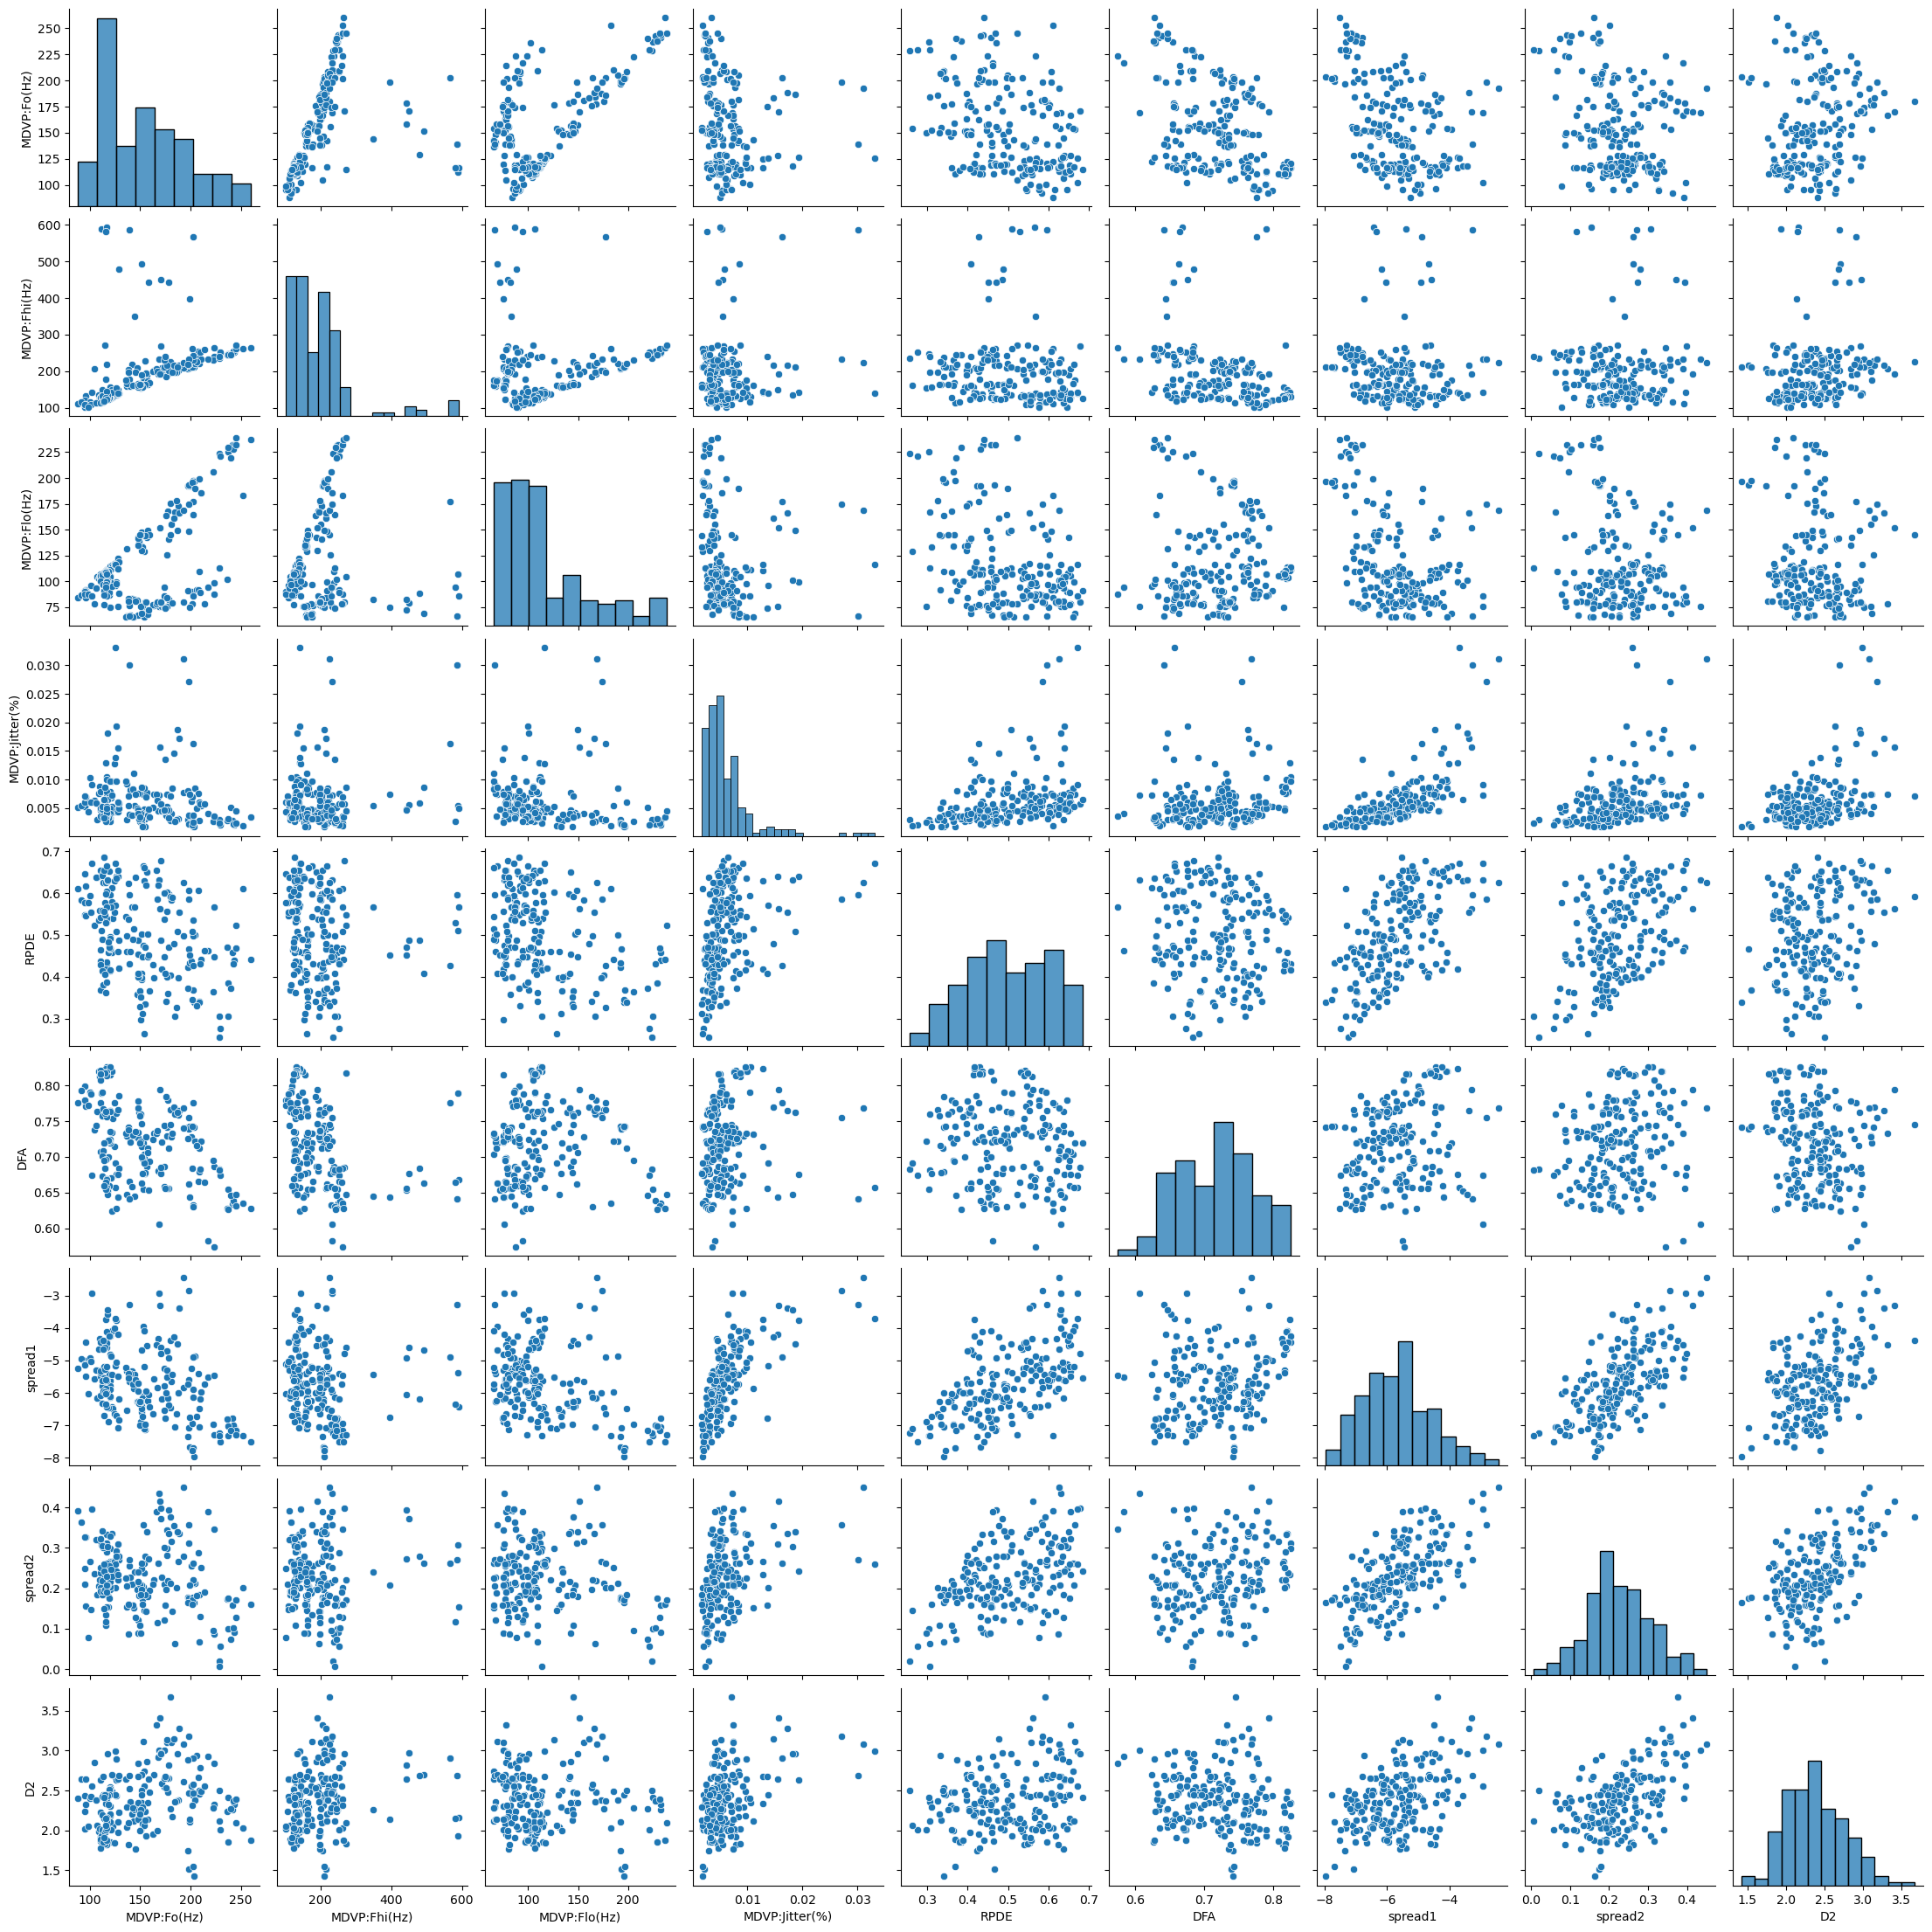

In [7]:
sns.pairplot(p_data_[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
'RPDE', 'DFA', 'spread1', 'spread2', 'D2']])

## Univariate Analysis
### I. Centrality measures (Central Tendency)
- Mean
- Median
- Mode
- Min
- Max

In [8]:
import plotly.express as px
def boxplot_of(name_of_col): # ' '
    fig_box = px.box(p_data_, y=name_of_col)
    fig_box.show()

In [9]:
round(p_data_[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
'RPDE', 'DFA', 'spread1', 'spread2', 'D2']].describe(), 2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),RPDE,DFA,spread1,spread2,D2
count,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00
mean,154.23,197.10,116.32,0.01,0.50,0.72,-5.68,0.23,2.38
std,41.39,91.49,43.52,0.00,0.10,0.06,1.09,0.08,0.38
min,88.33,102.14,65.48,0.00,0.26,0.57,-7.96,0.01,1.42
25%,117.57,134.86,84.29,0.00,0.42,0.67,-6.45,0.17,2.10
50%,148.79,175.83,104.32,0.00,0.50,0.72,-5.72,0.22,2.36
75%,182.77,224.21,140.02,0.01,0.59,0.76,-5.05,0.28,2.64
max,260.10,592.03,239.17,0.03,0.69,0.83,-2.43,0.45,3.67


In [10]:
from scipy import stats
for i in p_data_[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
'RPDE', 'DFA', 'spread1', 'spread2', 'D2']].columns:
    print(stats.mode(p_data_[i], keepdims=False))

ModeResult(mode=88.333, count=1)
ModeResult(mode=102.145, count=1)
ModeResult(mode=65.476, count=1)
ModeResult(mode=0.00369, count=3)
ModeResult(mode=0.25657, count=1)
ModeResult(mode=0.574282, count=1)
ModeResult(mode=-7.964984, count=1)
ModeResult(mode=0.210279, count=2)
ModeResult(mode=1.423287, count=1)


### II. Measures of dispersion
- Range
- Quartile
- IQR
- Variance
- Standard Deviation
- Skewness and Kurtosis

In [11]:
def measures_of_dispersion(col):
    #Range
    range_ = round(col.max() - col.min(), 3)
    print(f"Range= {range_}\n")

    #Quartile
    import numpy as np
    Q1 = round(np.percentile(col, 25), 3)
    Q2 = round(np.percentile(col, 50), 3)
    Q3 = round(np.percentile(col, 75), 3)
    print(f"Q1= {Q1}\nQ2= {Q2}\nQ3= {Q3}\n")

    ##Interquartile Range
    IQR = round(Q3 - Q1, 3)
    print(f"IQR= {IQR}\n")

    #Variance
    print(f"Variance= {round(col.var(), 3)}\n")

    #Standard Deviation
    print(f"Standard Deviation= {round(col.std(), 3)}\n")
    # import statistics
    # statistics.stdev()

    #Skewness
    #import scipy
    #scipy.stats.skew()
    skew = round(col.skew(), 3)
    print(f"Skewness= {skew}")
    if skew == 0:
        print('>>>Normal/ Symmetrical Distribution because skewness = 0')
    elif skew > 0:
        print('>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0')
    else: #skew < 0
        print('>>>Negative skew/ Left-skewed Distribution (mode > median > mean) because skewness < 0\n') 

    #Kurtosis
    #scipy.stats.kurtosis()
    print(f"\nKurtosis= {round(col.kurtosis(), 3)}\n")

    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(col)
    plt.subplot(1, 2, 2)
    plt.hist(col)
    plt.show()

### III. Outliers

In [ ]:
def outliers_of(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    #Number of upper outliers
    num_out_upper = data[data[name_of_col] > (Q3 + 1.5*IQR)].shape[0]
    print(f"The number of upper outliers= {num_out_upper}\n")

    #Number of lower outliers
    num_out_lower = data[data[name_of_col] < (Q1 - 1.5*IQR)].shape[0]
    print(f"The number of lower outliers= {num_out_lower}\n")

    #Percentage of outliers
    outliers_per = (num_out_upper + num_out_lower)/data.shape[0]
    print(f"The percentage of outliers= {round(outliers_per, 3)*100}%")

#### 1. 'MDVP:Fo(Hz)'

In [12]:
boxplot_of('MDVP:Fo(Hz)')

Range= 171.772

Q1= 117.572
Q2= 148.79
Q3= 182.769

IQR= 65.197

Variance= 1713.137

Standard Deviation= 41.39

Skewness= 0.592
>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0

Kurtosis= -0.628



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



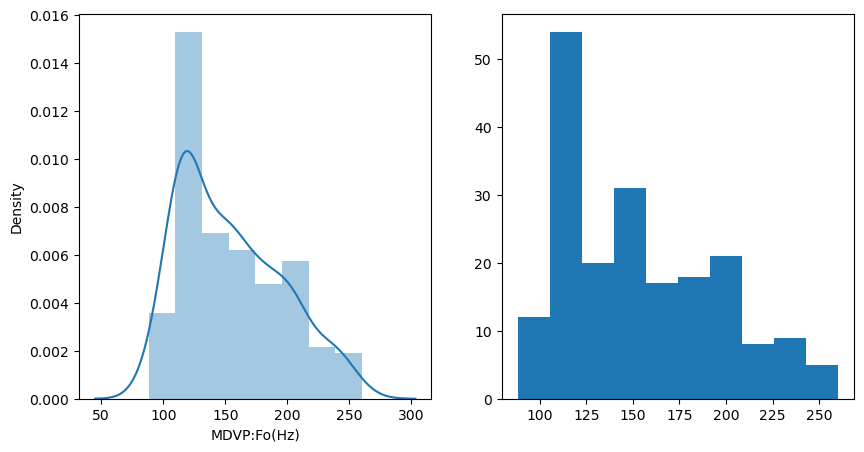

In [13]:
measures_of_dispersion(p_data_['MDVP:Fo(Hz)'])

#### 2. 'MDVP:Fhi(Hz)'

In [14]:
boxplot_of('MDVP:Fhi(Hz)')

In [43]:
outliers_of(p_data_, 'MDVP:Fhi(Hz)')

The number of upper outliers= 11

The number of lower outliers= 0

The percentage of outliers= 5.6000000000000005%


Range= 489.885

Q1= 134.862
Q2= 175.829
Q3= 224.206

IQR= 89.344

Variance= 8370.703

Standard Deviation= 91.492

Skewness= 2.542
>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0

Kurtosis= 7.627



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



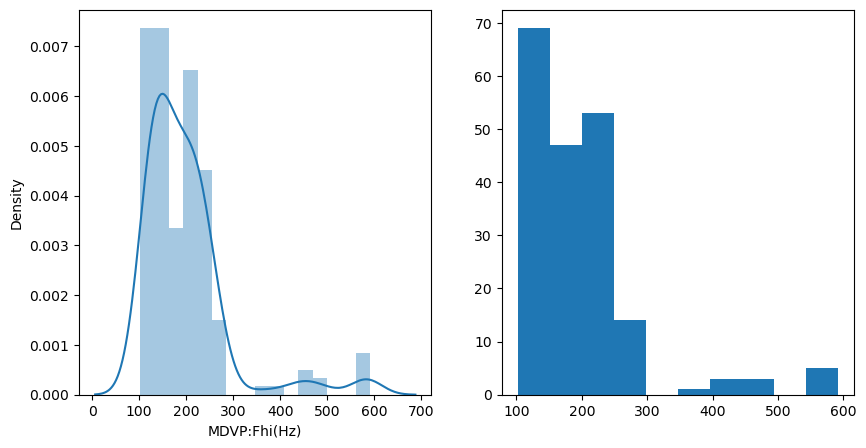

In [15]:
measures_of_dispersion(p_data_['MDVP:Fhi(Hz)'])

#### 3. 'MDVP:Flo(Hz)'

In [16]:
boxplot_of('MDVP:Flo(Hz)')

In [42]:
outliers_of(p_data_, 'MDVP:Flo(Hz)')

The number of upper outliers= 9

The number of lower outliers= 0

The percentage of outliers= 4.6%


Range= 173.694

Q1= 84.291
Q2= 104.315
Q3= 140.019

IQR= 55.728

Variance= 1894.113

Standard Deviation= 43.521

Skewness= 1.217
>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0

Kurtosis= 0.655



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



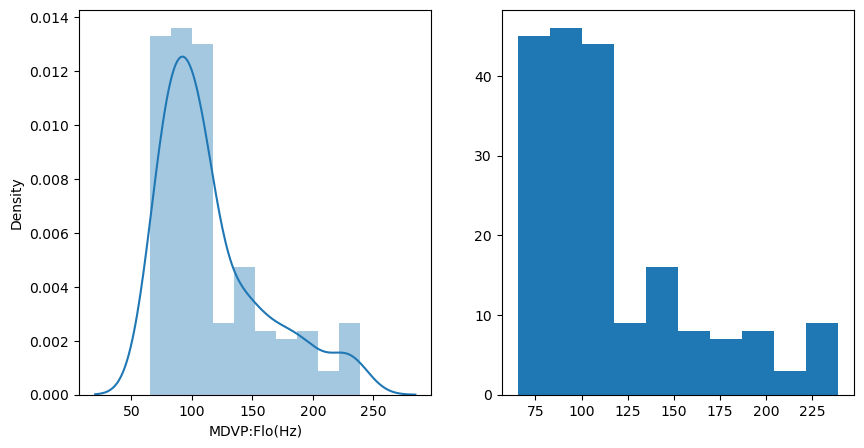

In [17]:
measures_of_dispersion(p_data_['MDVP:Flo(Hz)'])

#### 4. 'MDVP:Jitter(%)'

In [18]:
boxplot_of('MDVP:Jitter(%)')

In [41]:
outliers_of(p_data_, 'MDVP:Jitter(%)')

The number of upper outliers= 14

The number of lower outliers= 0

The percentage of outliers= 7.199999999999999%


Range= 0.031

Q1= 0.003
Q2= 0.005
Q3= 0.007

IQR= 0.004

Variance= 0.0

Standard Deviation= 0.005

Skewness= 3.085
>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0

Kurtosis= 12.031



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



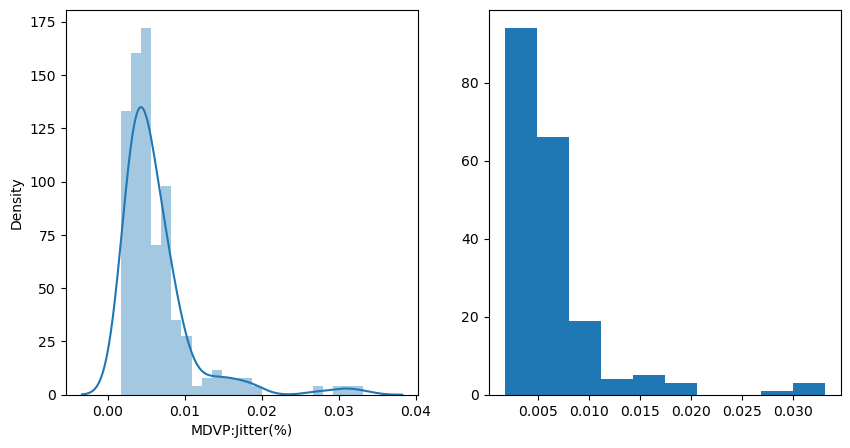

In [19]:
measures_of_dispersion(p_data_['MDVP:Jitter(%)'])

#### 5. 'RPDE'

In [20]:
boxplot_of('RPDE')

Range= 0.429

Q1= 0.421
Q2= 0.496
Q3= 0.588

IQR= 0.167

Variance= 0.011

Standard Deviation= 0.104

Skewness= -0.143
>>>Negative skew/ Left-skewed Distribution (mode > median > mean) because skewness < 0


Kurtosis= -0.922



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



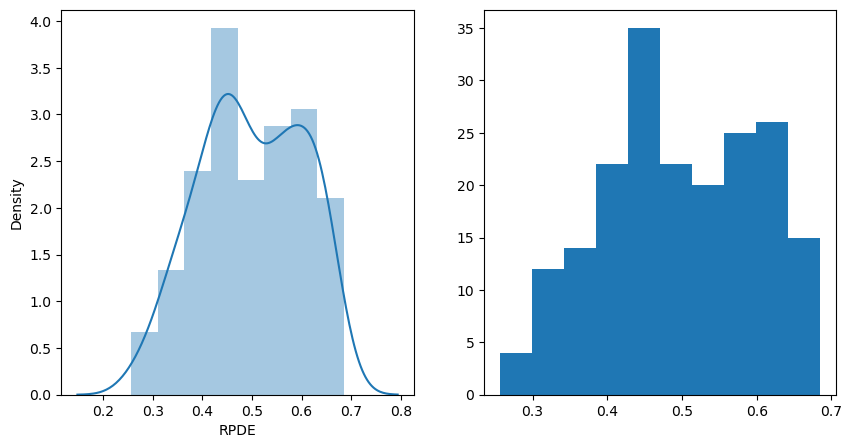

In [21]:
measures_of_dispersion(p_data_['RPDE'])

#### 6. 'DFA'

In [22]:
boxplot_of('DFA')

Range= 0.251

Q1= 0.675
Q2= 0.722
Q3= 0.762

IQR= 0.087

Variance= 0.003

Standard Deviation= 0.055

Skewness= -0.033
>>>Negative skew/ Left-skewed Distribution (mode > median > mean) because skewness < 0


Kurtosis= -0.686



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



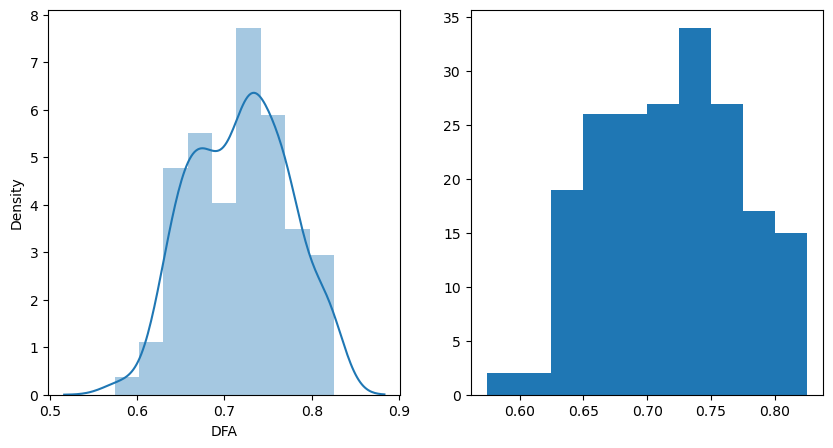

In [23]:
measures_of_dispersion(p_data_['DFA'])

#### 7. 'spread1'

In [24]:
boxplot_of('spread1')

In [44]:
outliers_of(p_data_, 'spread1')

The number of upper outliers= 4

The number of lower outliers= 0

The percentage of outliers= 2.1%


Range= 5.531

Q1= -6.45
Q2= -5.721
Q3= -5.046

IQR= 1.404

Variance= 1.189

Standard Deviation= 1.09

Skewness= 0.432
>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0

Kurtosis= -0.05



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



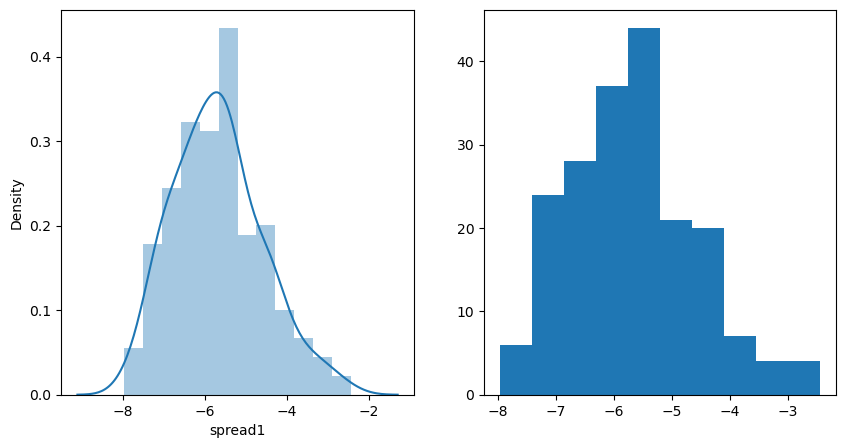

In [25]:
measures_of_dispersion(p_data_['spread1'])

#### 8. 'spread2'

In [26]:
boxplot_of('spread2')

In [45]:
outliers_of(p_data_, 'spread2')

The number of upper outliers= 1

The number of lower outliers= 1

The percentage of outliers= 1.0%


Range= 0.444

Q1= 0.174
Q2= 0.219
Q3= 0.279

IQR= 0.105

Variance= 0.007

Standard Deviation= 0.083

Skewness= 0.144
>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0

Kurtosis= -0.083



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



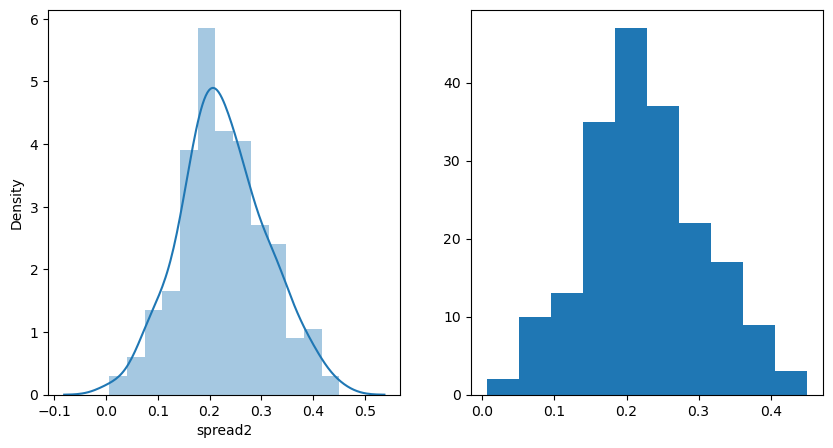

In [27]:
measures_of_dispersion(p_data_['spread2'])

#### 9. 'D2'

In [28]:
boxplot_of('D2')

In [46]:
outliers_of(p_data_, 'D2')

The number of upper outliers= 1

The number of lower outliers= 0

The percentage of outliers= 0.5%


Range= 2.248

Q1= 2.099
Q2= 2.362
Q3= 2.636

IQR= 0.537

Variance= 0.147

Standard Deviation= 0.383

Skewness= 0.43
>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0

Kurtosis= 0.22



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



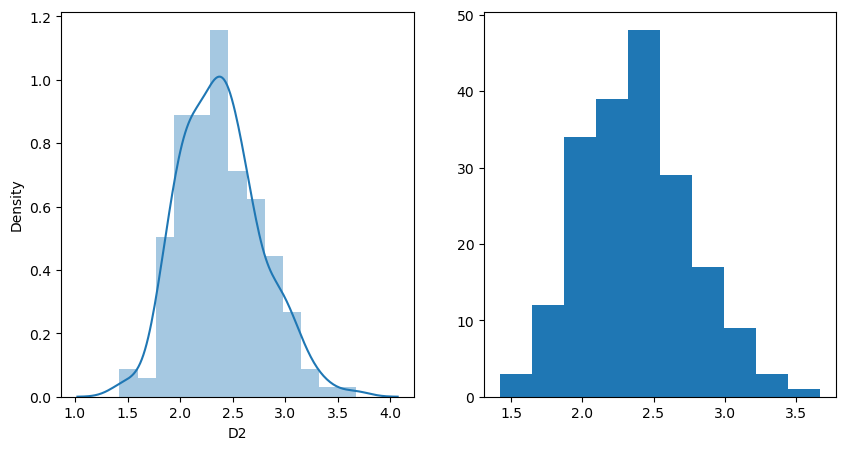

In [29]:
measures_of_dispersion(p_data_['D2'])

In [31]:
# import scipy
# zscore_PPE = scipy.stats.zscore(p_data_.PPE)
# outliers_zscore_PPE = zscore_PPE[[(n <= -2.5)|(n >= 2.5) for n in zscore_PPE]]
# indexes = zscore_PPE.tolist().index(outliers_zscore_PPE)
# indexes